In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter
from sympy.physics.quantum.cg import CG

In [2]:
%run Q_and_M_database.ipynb

Number of misbehaved entries:  1
Total number of entries analyzed:  1208
Total number of entries uncleaned:  1208
Total number of entries inserted:  1175
Long lived magnetic dipole moments loaded as M_LL
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, mu, un].
Number of misbehaved entries:  65
Total number of entries analyzed:  1356
Total number of entries uncleaned:  1356
Total number of entries inserted:  1164
Short lived magnetic dipole moments loaded as M_SL
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, q, un, E, jp].
Magnetic dipole moments loaded as M
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, mu, un].
Total number of entries uncleaned:  2564
Total number of entries inserted:  2339
Number of misbehaved entries:  164
Total number of entries analyzed:  1468
Total number of entr

In [3]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter

# Constants
hbar = 6.582119569*10**(-22)           # MeV*s
c = 2.99792458*10**(8)*10**(15)        # fm/s
m_p = 938.27/c**2                      # MeV*s²/fm²
m_n = 939.57/c**2                      # MeV*s²/fm²

def hbaromega(A):                          # Parameters: A mass number of nucleus
    return 45*A**(-1/3) - 25*A**(-2/3) 

def b(m,A):                                # Parameters: m mass of nucleon, A mass number of nucleus
    return hbar/np.sqrt(m*hbaromega(A))


# Harmonic oscillator radial wavefunction
def psiHO(r, n, l, m, A):                 # Parameters: r coordinate, n radial quantum number
                                          #             l orbital angular momentum,
                                          #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    norm = np.sqrt(2*scp.special.factorial(n)/(bv**3*scp.special.gamma(n+l+3/2)))
    return norm*(r/bv)**l*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n, k = l+1/2)

# Function to compute matrix elements <r^2>
def Integrand(r,n1,n2,l,j,m,A,part):           # Parameters: r coordinate, n1, n2 radial quantum numbers, 
                                                 #             l orbital angular momentum, N number of neutrons,
                                                 #             Z number of protons, part = 0 for proton and 
                                                 #             1 for neutron, j total angular momentum
    f1 = psiHO(r, n1, l, m, A)
    
    return r**4*f1*f1

def MatrixElement(n1,n2,l,j,m,A,part):
    
    return scp.integrate.quad(Integrand, 0, 500, args=(n1,n2,l,j,m,A,part))[0]   # Integral up to 200fm

In [4]:
# Filtering for ground states only, odd-A
Q_dep = Q.copy()
Q_dep["A"] = pd.to_numeric(Q_dep["A"], downcast='integer', errors='coerce')
Q_dep= Q_dep[Q_dep["E(level)"]=="0"]
Q_dep = Q_dep[~Q_dep["I"].str.contains("or")]
Q_dep = Q_dep[~Q_dep["I"].str.contains(",")]
Q_dep_odd_A = Q_dep[Q_dep["A"]%2==1]
Q_dep_odd_A=Q_dep_odd_A.reset_index()#.drop("index", axis="column")
Q_dep_odd_A.loc[131, "I"] = "5/2+"   # Error in Stone table


dataqdep_odd = extract_q(Q_dep_odd_A, remove_unassigned="yes") # ONLY MEASUREMENTS WITH SIGN ARE USED

None of the available formats:


index                                             1135
Z                                                   91
Sym                                                 Pa
A                                                  231
E(level)                                             0
T_1/2                                         3.3x104y
I                                                 3/2-
Q(b)                                        [-1.72(5)]
Ref._Std.                                             
Method                                            from
NSR_Keynumber                                    B(E2)
Journal_reference    notmeasured1978Fr28PLA69225(1975)
Name: 401, dtype: object

In [5]:
# COnverting the spin values in floats
for j in range(len(dataqdep_odd[5])):
    
    dataqdep_odd[5][j]=dataqdep_odd[5][j].replace(")","").replace("+","").replace("-","").replace("(","").replace("[","").replace("]","")
    
    if "/" in dataqdep_odd[5][j]:
        num = int(dataqdep_odd[5][j].split("/")[0])
        den = int(dataqdep_odd[5][j].split("/")[1])
        dataqdep_odd[5][j]=float(num/den)
        
    else:
        dataqdep_odd[5][j] = int(dataqdep_odd[5][j])  
        
        
# Converting Q into Q_o along with the errors

for j in range(len(dataqdep_odd[2])):

    dataqdep_odd[2][j] = (dataqdep_odd[5][j]+1)*(2*dataqdep_odd[5][j]+3)/(dataqdep_odd[5][j]*(2*dataqdep_odd[5][j]-1))*dataqdep_odd[2][j] 
    dataqdep_odd[3][j] = (dataqdep_odd[5][j]+1)*(2*dataqdep_odd[5][j]+3)/(dataqdep_odd[5][j]*(2*dataqdep_odd[5][j]-1))*dataqdep_odd[3][j]
    

# Plot of ground states odd-A only $Q_0$ in 3d

<IPython.core.display.Javascript object>


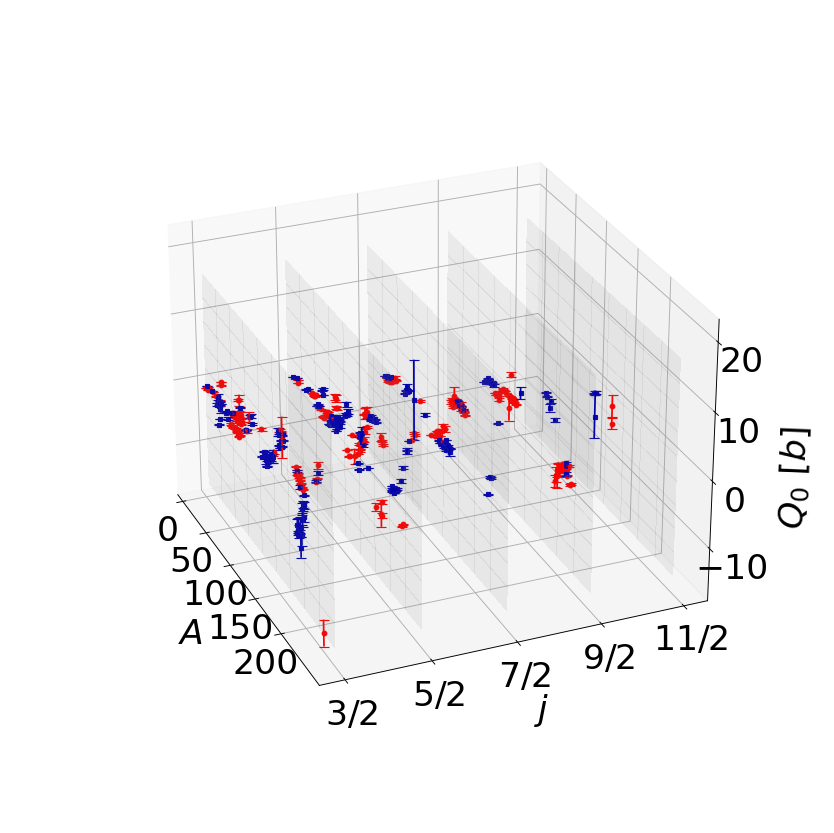

In [6]:
%matplotlib notebook

fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(projection='3d')
plt.rcParams["text.usetex"] = True

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd[3])):
    try: 
        if len(dataqdep_odd[3][i]) == 2:
            lower_error.append(dataqdep_odd[3][i][1])
            upper_error.append(dataqdep_odd[3][i][0])
    except: 
        lower_error.append(dataqdep_odd[3][i])
        upper_error.append(dataqdep_odd[3][i])

dataq_A = [] 

dataq_A_oddZ = [] 
dataq_A_oddN = [] 

dataq_Z = [] 
dataq_N = [] 

dataqq_oddZ = [] 
dataq_lower_oddZ = [] 
dataq_upper_oddZ = [] 

dataqq_oddN = [] 
dataq_lower_oddN = [] 
dataq_upper_oddN = [] 

dataq_loweroddZ = [] 
dataq_upperoddZ = [] 

dataq_loweroddN = [] 
dataq_upperoddN = [] 

dataq_jp = []

dataqq_oddZ_j = []
dataqq_oddN_j = []


for i in range(len(dataqdep_odd[0])):
    
    if dataqdep_odd[0][i]%2==1:
        dataq_Z.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddZ.append(dataqdep_odd[1][i])
        dataqq_oddZ.append(dataqdep_odd[2][i])      
        dataqq_oddZ_j.append(dataqdep_odd[5][i])
        dataq_loweroddZ.append(lower_error[i])
        dataq_upperoddZ.append(upper_error[i])
        
    else:
        
        dataq_N.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddN.append(dataqdep_odd[1][i])
        dataqq_oddN.append(dataqdep_odd[2][i])   
        dataqq_oddN_j.append(dataqdep_odd[5][i])
        dataq_loweroddN.append(lower_error[i])
        dataq_upperoddN.append(upper_error[i])   
        
    
asymmetric_erroroddZ = np.array(list(zip(dataq_loweroddZ, dataq_upperoddZ))).T
asymmetric_erroroddN = np.array(list(zip(dataq_loweroddN, dataq_upperoddN))).T

ax.errorbar(dataq_A_oddZ, dataqq_oddZ_j, dataqq_oddZ, zerr=asymmetric_erroroddZ, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 
ax.errorbar(dataq_A_oddN, dataqq_oddN_j, dataqq_oddN, zerr=asymmetric_erroroddN, fmt='s', color = "#0000AF" ,markersize=4, capsize=4, label="Odd-$N$") 

# =================================================================================        

plt.xticks(np.arange(0,250,50), fontsize=30)
plt.yticks([0.5, 1.5,2.5,3.5,4.5,5.5],["$1/2$", "$3/2$","$5/2$","$7/2$","$9/2$","$11/2$"], fontsize=30)
ax.tick_params(axis='z', labelsize=30)

ax.set_xlabel(r'$A$', labelpad=20, fontsize=30)
ax.set_ylabel(r'$j$', labelpad=20, fontsize=30)
ax.set_zlabel(r"$Q_0$ [$b$]", labelpad=20, fontsize=30)


# =================================================================================        

A_min = min(dataq_A_oddZ + dataq_A_oddN)
A_max = max(dataq_A_oddZ + dataq_A_oddN)

# Define the range of Q0 (z-axis)
Q_min = min(dataqq_oddZ + dataqq_oddN)
Q_max = max(dataqq_oddZ + dataqq_oddN)

# Create grid for the planes
A_vals = np.linspace(A_min, A_max, 10)
Q_vals = np.linspace(Q_min, Q_max, 10)
A_grid, Q_grid = np.meshgrid(A_vals, Q_vals)

# j values (y-axis) to draw planes for
j_vals = [ 1.5, 2.5, 3.5, 4.5, 5.5]  # corresponds to 1/2 ... 11/2

# Draw translucent planes
for j in j_vals:
    J_grid = np.full_like(A_grid, j)
    ax.plot_surface(A_grid, J_grid, Q_grid, alpha=0.1, color='gray', linewidth=0, antialiased=False)
    
# =================================================================================        








plt.show()

<IPython.core.display.Javascript object>


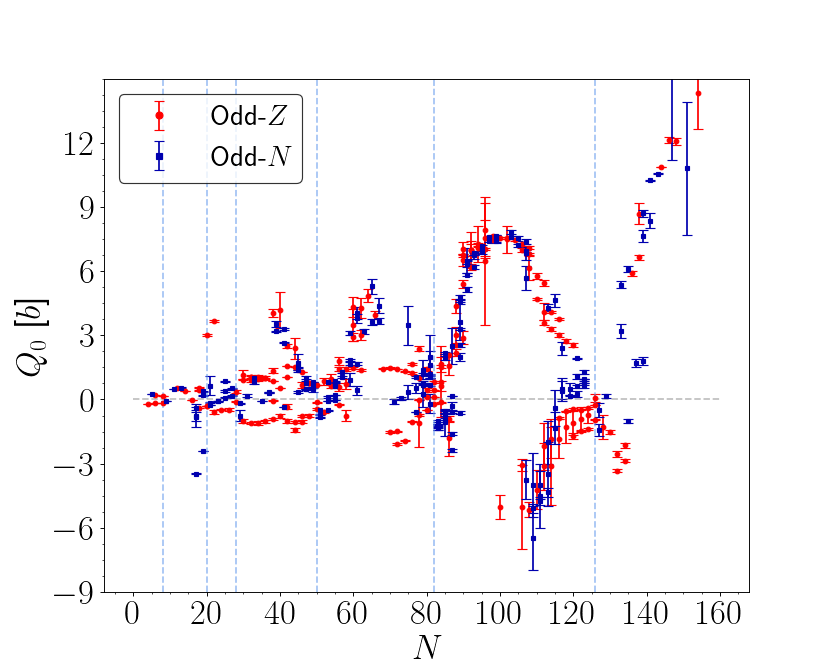

In [7]:
# Plot of 

plt.figure(figsize=((10,8)))
plt.rcParams["text.usetex"] = True

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd[3])):
    try: 
        if len(dataqdep_odd[3][i]) == 2:
            lower_error.append(dataqdep_odd[3][i][1])
            upper_error.append(dataqdep_odd[3][i][0])
    except: 
        lower_error.append(dataqdep_odd[3][i])
        upper_error.append(dataqdep_odd[3][i])
# =================================================================================        

# Odd Z
#dataq_Z_Z = [] 
#dataq_A_Z = [] 
dataq_A = [] 

dataq_A_oddZ = [] 
dataq_A_oddN = [] 

dataq_Z = [] 
dataq_N = [] 

dataqq_oddZ = [] 
dataq_lower_oddZ = [] 
dataq_upper_oddZ = [] 

dataqq_oddN = [] 
dataq_lower_oddN = [] 
dataq_upper_oddN = [] 

dataq_loweroddZ = [] 
dataq_upperoddZ = [] 

dataq_loweroddN = [] 
dataq_upperoddN = [] 

dataq_jp = []


for i in range(len(dataqdep_odd[0])):
    
    if dataqdep_odd[0][i]%2==1:
        dataq_Z.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddZ.append(dataqdep_odd[1][i])
        dataqq_oddZ.append(dataqdep_odd[2][i])
        dataq_loweroddZ.append(lower_error[i])
        dataq_upperoddZ.append(upper_error[i])
        
    else:
        
        dataq_N.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddN.append(dataqdep_odd[1][i])
        dataqq_oddN.append(dataqdep_odd[2][i])    
        dataq_loweroddN.append(lower_error[i])
        dataq_upperoddN.append(upper_error[i])   
        
    
asymmetric_erroroddZ = np.array(list(zip(dataq_loweroddZ, dataq_upperoddZ))).T
asymmetric_erroroddN = np.array(list(zip(dataq_loweroddN, dataq_upperoddN))).T

plt.errorbar(dataq_Z, dataqq_oddZ, yerr=asymmetric_erroroddZ, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 
plt.errorbar(dataq_N, dataqq_oddN, yerr=asymmetric_erroroddN, fmt='s', color = "#0000AF" ,markersize=4, capsize=4, label="Odd-$N$") 
plt.vlines(8, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(20, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(28, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(50, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(82, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(126, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)

plt.ylim(-8, 15)

plt.xticks(np.arange(0,300,20), fontsize=30)
plt.yticks(np.arange(-9, 15,3), fontsize=30)


plt.xlabel("$N$", fontsize=30)
plt.ylabel(r"$Q_0$ [$b$]", size=30)
#plt.text(150, 7.8, "(a)", fontsize=45, weight='bold' )
plt.hlines(0, 0, 160, colors='gray', linestyles='--', alpha=0.5)

plt.minorticks_on()
# plt.tick_params(axis='x', which='minor', bottom=False)
# plt.tick_params(axis='y', which='minor', length=2, width=1)



# # Adding sp-lines
# plt.plot(np.arange(0,165,5), Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(9/2,np.arange(0,165,5)), "o-")

# plt.plot(np.arange(0,165,5), -1*Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(9/2,np.arange(0,165,5)), "o-")

c3 = "#FF60FD"

# plt.plot(N_values, -1*np.array(Q0_values), "-", c=c3, zorder=30, linewidth=2)
# plt.plot(N_values, Q0_values, "-", c=c3, zorder=30, linewidth=2, label=r"$Q_{0,sp}$")

# # Fill the area between the two curves
# plt.fill_between(
#     N_values,
#     Q0_values,
#     -1*np.array(Q0_values),
#     color=c3,
#     alpha=0.3,   # transparency
#     zorder=10
# )



plt.legend(fontsize=25, edgecolor="black", loc="upper left", markerscale=1.5)
plt.savefig("QExp1-odd-A.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-A.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-A.pdf", facecolor='white', bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


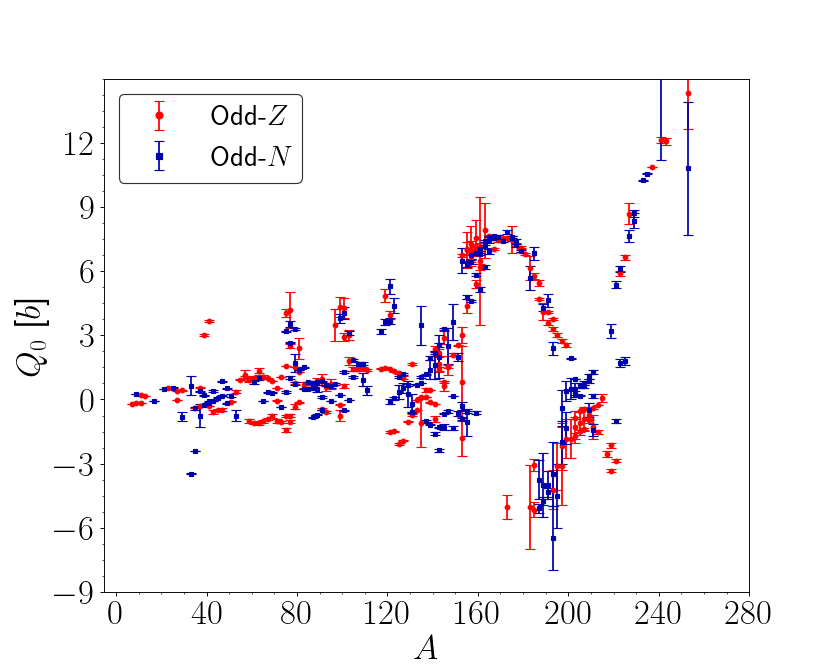

In [8]:
# Plot of 

plt.figure(figsize=((10,8)))
plt.rcParams["text.usetex"] = True

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd[3])):
    try: 
        if len(dataqdep_odd[3][i]) == 2:
            lower_error.append(dataqdep_odd[3][i][1])
            upper_error.append(dataqdep_odd[3][i][0])
    except: 
        lower_error.append(dataqdep_odd[3][i])
        upper_error.append(dataqdep_odd[3][i])
# =================================================================================        

# Odd Z
#dataq_Z_Z = [] 
#dataq_A_Z = [] 
dataq_A = [] 

dataq_A_oddZ = [] 
dataq_A_oddN = [] 

dataq_Z = [] 
dataq_N = [] 

dataqq_oddZ = [] 
dataq_lower_oddZ = [] 
dataq_upper_oddZ = [] 

dataqq_oddN = [] 
dataq_lower_oddN = [] 
dataq_upper_oddN = [] 

dataq_loweroddZ = [] 
dataq_upperoddZ = [] 

dataq_loweroddN = [] 
dataq_upperoddN = [] 

dataq_jp = []


for i in range(len(dataqdep_odd[0])):
    
    if dataqdep_odd[0][i]%2==1:
        dataq_Z.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddZ.append(dataqdep_odd[1][i])
        dataqq_oddZ.append(dataqdep_odd[2][i])
        dataq_loweroddZ.append(lower_error[i])
        dataq_upperoddZ.append(upper_error[i])
        
    else:
        
        dataq_N.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddN.append(dataqdep_odd[1][i])
        dataqq_oddN.append(dataqdep_odd[2][i])    
        dataq_loweroddN.append(lower_error[i])
        dataq_upperoddN.append(upper_error[i])   
        
    
asymmetric_erroroddZ = np.array(list(zip(dataq_loweroddZ, dataq_upperoddZ))).T
asymmetric_erroroddN = np.array(list(zip(dataq_loweroddN, dataq_upperoddN))).T

plt.errorbar(dataq_A_oddZ, dataqq_oddZ, yerr=asymmetric_erroroddZ, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 
plt.errorbar(dataq_A_oddN, dataqq_oddN, yerr=asymmetric_erroroddN, fmt='s', color = "#0000AF" ,markersize=4, capsize=4, label="Odd-$N$") 
# plt.vlines(8, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
# plt.vlines(20, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
# plt.vlines(28, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
# plt.vlines(50, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
# plt.vlines(82, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
# plt.vlines(126, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)

plt.ylim(-8, 15)

plt.xticks(np.arange(0,300,40), fontsize=30)
plt.yticks(np.arange(-9, 15,3), fontsize=30)


plt.xlabel("$A$", fontsize=30)
plt.ylabel(r"$Q_0$ [$b$]", size=30)
#plt.text(150, 7.8, "(a)", fontsize=45, weight='bold' )
#plt.hlines(0, 0, 160, colors='gray', linestyles='--', alpha=0.5)

plt.minorticks_on()
# plt.tick_params(axis='x', which='minor', bottom=False)
# plt.tick_params(axis='y', which='minor', length=2, width=1)



# # Adding sp-lines
# plt.plot(np.arange(0,165,5), Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(9/2,np.arange(0,165,5)), "o-")

# plt.plot(np.arange(0,165,5), -1*Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(9/2,np.arange(0,165,5)), "o-")

c3 = "#FF60FD"

# plt.plot(N_values, -1*np.array(Q0_values), "-", c=c3, zorder=30, linewidth=2)
# plt.plot(N_values, Q0_values, "-", c=c3, zorder=30, linewidth=2, label=r"$Q_{0,sp}$")

# # Fill the area between the two curves
# plt.fill_between(
#     N_values,
#     Q0_values,
#     -1*np.array(Q0_values),
#     color=c3,
#     alpha=0.3,   # transparency
#     zorder=10
# )



plt.legend(fontsize=25, edgecolor="black", loc="upper left", markerscale=1.5)
plt.savefig("QExp1-odd-Avs-A.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-Avs-A.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-Avs-A.pdf", facecolor='white', bbox_inches='tight')

plt.show()

# Plot of $Q_0/<r^2>=-e\frac{2j+3}{2j}$

In [11]:
# Phenomenological msr in barns
def msr(A):
    return 3/5*1.2**2*A**(2/3)/100

# Dependence on angular momentum
def ang_mom_dependence(j):
    return -(2*j+3)/(2*j)

# Converting Q into Q_o along with the errors
dataqdep_odd_overr2 = dataqdep_odd.copy()

for j in range(len(dataqdep_odd_overr2[2])):

    dataqdep_odd_overr2[2][j] = dataqdep_odd_overr2[2][j]/msr(dataqdep_odd_overr2[1][j])
    dataqdep_odd_overr2[3][j] = dataqdep_odd_overr2[3][j]/msr(dataqdep_odd_overr2[1][j])
    
#[Z, A, q, un, E, jp]

<IPython.core.display.Javascript object>


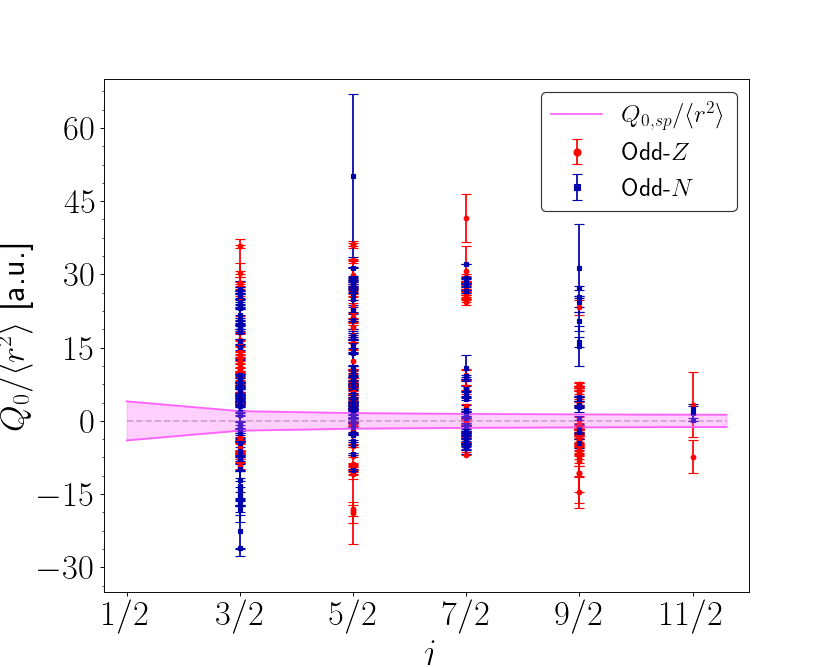

In [12]:
plt.figure(figsize=((10,8)))

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd_overr2[3])):
    try: 
        if len(dataqdep_odd_overr2[3][i]) == 2:
            lower_error.append(dataqdep_odd_overr2[3][i][1])
            upper_error.append(dataqdep_odd_overr2[3][i][0])
    except: 
        lower_error.append(dataqdep_odd_overr2[3][i])
        upper_error.append(dataqdep_odd_overr2[3][i])
# =================================================================================        

# Odd Z
#dataqdep_odd_overr2_Z_Z = [] 
#dataqdep_odd_overr2_A_Z = [] 
dataqdep_odd_overr2_mu_Z = [] 
dataqdep_odd_overr2_lower_Z = [] 
dataqdep_odd_overr2_upper_Z = [] 
#dataqdep_odd_overr2_E_Z = [] 
dataqdep_odd_overr2_jp_Z = []

# Odd N
#dataqdep_odd_overr2_Z_N = [] 
#dataqdep_odd_overr2_A_N = [] 
dataqdep_odd_overr2_mu_N = [] 
dataqdep_odd_overr2_lower_N = [] 
dataqdep_odd_overr2_upper_N = [] 
#dataqdep_odd_overr2_E_N = [] 
dataqdep_odd_overr2_jp_N = []

for i in range(len(dataqdep_odd_overr2[0])):
    
    if (dataqdep_odd_overr2[0][i]%2==1):        
        jjpp = float(dataqdep_odd_overr2[5][i])
        dataqdep_odd_overr2_mu_Z.append(dataqdep_odd_overr2[2][i])
        dataqdep_odd_overr2_lower_Z.append(lower_error[i])
        dataqdep_odd_overr2_upper_Z.append(upper_error[i])
        dataqdep_odd_overr2_jp_Z.append(jjpp)
    
    if (dataqdep_odd_overr2[0][i]%2==0):
        
        jjpp = float(dataqdep_odd_overr2[5][i])
        dataqdep_odd_overr2_mu_N.append(dataqdep_odd_overr2[2][i])
        dataqdep_odd_overr2_lower_N.append(lower_error[i])
        dataqdep_odd_overr2_upper_N.append(upper_error[i])
        dataqdep_odd_overr2_jp_N.append(jjpp)
    
asymmetric_error_Z = np.array(list(zip(dataqdep_odd_overr2_lower_Z, dataqdep_odd_overr2_upper_Z))).T
plt.errorbar(dataqdep_odd_overr2_jp_Z, dataqdep_odd_overr2_mu_Z, yerr=asymmetric_error_Z, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 

asymmetric_error_N = np.array(list(zip(dataqdep_odd_overr2_lower_N, dataqdep_odd_overr2_upper_N))).T
plt.errorbar(dataqdep_odd_overr2_jp_N, dataqdep_odd_overr2_mu_N, yerr=asymmetric_error_N, fmt='s', color = "#0000AF", markersize=4, capsize=4, label="Odd-$N$") 
plt.hlines(0, 1/2, 5.8, colors='gray', linestyles='--', alpha=0.5)


#plt.yticks(np.arange(int(min(dataqdep_odd_overr2[2]))-1, int(max(dataqdep_odd_overr2[2]))+2, 1), size=20)
plt.xlim(0.3,6)
plt.ylim(-35,70)

plt.xticks([0.5, 1.5,2.5,3.5,4.5,5.5],["$1/2$", "$3/2$","$5/2$","$7/2$","$9/2$","$11/2$"], fontsize=30)
plt.yticks(np.arange(-30,70,15) ,fontsize=30)

from matplotlib.ticker import AutoMinorLocator
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

c3 = "#FF60FD"

jj=np.array([0.5, 1.5,2.5,3.5,4.5,5.5,5.8])
Q_sp_j_dep = ang_mom_dependence(jj)
plt.plot(jj,Q_sp_j_dep,"-", c=c3, label=r"$Q_{0,sp}/\langle r^2\rangle$ ")
plt.plot(jj,-1*Q_sp_j_dep,"-", c=c3)

# Fill the area between the two curves
plt.fill_between(
    jj,
    Q_sp_j_dep,
    -1*np.array(Q_sp_j_dep),
    color=c3,
    alpha=0.3,   # transparency
    zorder=10
)

plt.xlabel("$j$", size=30)
plt.ylabel(r"$Q_0/\langle r^2\rangle$ [a.u.]", size=30)

plt.legend(fontsize=22, edgecolor="black", loc="upper right", markerscale=1.5)
plt.savefig("QExp-gs-odd-A-no-A-dep.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-A-dep.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-A-dep.pdf", facecolor='white', bbox_inches='tight')

plt.show()

# Plot of $\frac{Q_0}{e\frac{2j+3}{2j}}=-<r^2>$

In [17]:
# Phenomenological msr in barns
def msr(A):
    return 3/5*1.2**2*A**(2/3)/100

# Dependence on angular momentum
def ang_mom_dependence(j):
    return (2*j+3)/(2*j)

# Converting Q into Q_o along with the errors
dataqdep_odd_overj = dataqdep_odd.copy()

for j in range(len(dataqdep_odd_overj[2])):
    
    dataqdep_odd_overj[2][j] = dataqdep_odd_overj[2][j]/ang_mom_dependence(dataqdep_odd_overj[5][j])
    dataqdep_odd_overj[3][j] = dataqdep_odd_overj[3][j]/ang_mom_dependence(dataqdep_odd_overj[5][j])
    
#[Z, A, q, un, E, jp]

<IPython.core.display.Javascript object>


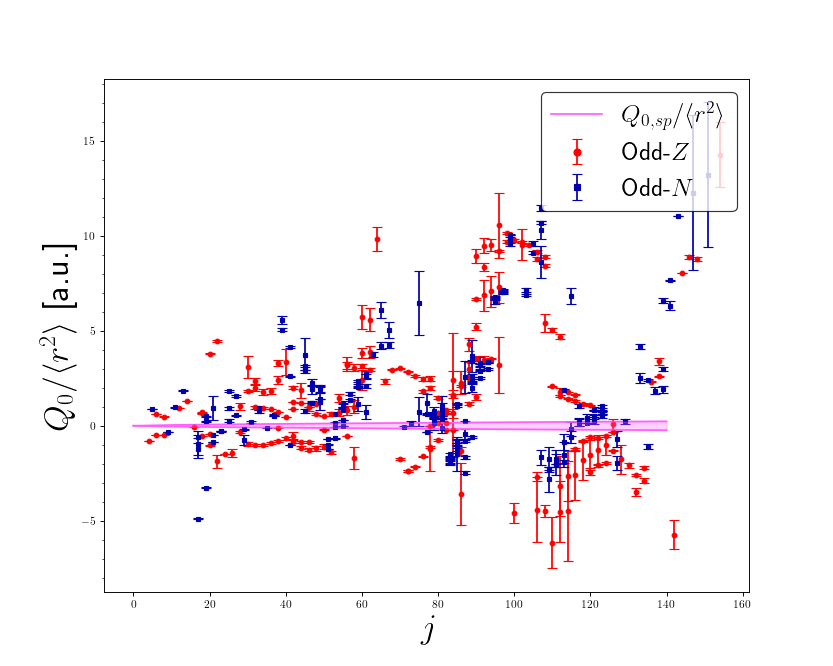

In [20]:
plt.figure(figsize=((10,8)))

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd_overj[3])):
    try: 
        if len(dataqdep_odd_overj[3][i]) == 2:
            lower_error.append(dataqdep_odd_overj[3][i][1])
            upper_error.append(dataqdep_odd_overj[3][i][0])
    except: 
        lower_error.append(dataqdep_odd_overj[3][i])
        upper_error.append(dataqdep_odd_overj[3][i])
# =================================================================================        

# Odd Z
dataqdep_odd_overj_A_Z = [] 
dataqdep_odd_overj_A_N = [] 

dataqdep_odd_overj_mu_Z = [] 
dataqdep_odd_overj_lower_Z = [] 
dataqdep_odd_overj_upper_Z = [] 
#dataqdep_odd_overr2_E_Z = [] 
dataqdep_odd_overj_jp_Z = []

# Odd N
#dataqdep_odd_overr2_Z_N = [] 
#dataqdep_odd_overr2_A_N = [] 
dataqdep_odd_overj_mu_N = [] 
dataqdep_odd_overj_lower_N = [] 
dataqdep_odd_overj_upper_N = [] 
#dataqdep_odd_overr2_E_N = [] 
dataqdep_odd_overj_jp_N = []

for i in range(len(dataqdep_odd_overj[0])):
    
    if (dataqdep_odd_overj[0][i]%2==1):        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_Z.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_Z.append(lower_error[i])
        dataqdep_odd_overj_upper_Z.append(upper_error[i])
        dataqdep_odd_overj_jp_Z.append(jjpp)
        dataqdep_odd_overj_A_Z.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])
    
    if (dataqdep_odd_overj[0][i]%2==0):
        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_N.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_N.append(lower_error[i])
        dataqdep_odd_overj_upper_N.append(upper_error[i])
        dataqdep_odd_overj_jp_N.append(jjpp)
        dataqdep_odd_overj_A_N.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])

    
asymmetric_error_Z = np.array(list(zip(dataqdep_odd_overj_lower_Z, dataqdep_odd_overj_upper_Z))).T
plt.errorbar(dataqdep_odd_overj_A_Z, dataqdep_odd_overj_mu_Z, yerr=asymmetric_error_Z, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 

asymmetric_error_N = np.array(list(zip(dataqdep_odd_overj_lower_N, dataqdep_odd_overj_upper_N))).T
plt.errorbar(dataqdep_odd_overj_A_N, dataqdep_odd_overj_mu_N, yerr=asymmetric_error_N, fmt='s', color = "#0000AF", markersize=4, capsize=4, label="Odd-$N$") 
#plt.hlines(0, 1/2, 5.8, colors='gray', linestyles='--', alpha=0.5)


#plt.yticks(np.arange(int(min(dataqdep_odd_overr2[2]))-1, int(max(dataqdep_odd_overr2[2]))+2, 1), size=20)
#plt.xlim(0.3,6)
#plt.ylim(-35,70)

#plt.xticks([0.5, 1.5,2.5,3.5,4.5,5.5],["$1/2$", "$3/2$","$5/2$","$7/2$","$9/2$","$11/2$"], fontsize=30)
#plt.yticks(np.arange(-30,70,15) ,fontsize=30)

from matplotlib.ticker import AutoMinorLocator
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

c3 = "#FF60FD"

msr_range=np.arange(0,150,10)
Q_sp_msr_dep = msr(msr_range)

plt.plot(msr_range, Q_sp_msr_dep,"-", c=c3, label=r"$Q_{0,sp}/\langle r^2\rangle$ ")
plt.plot(msr_range, -1*np.array(Q_sp_msr_dep),"-", c=c3)

# Fill the area between the two curves
plt.fill_between(
    msr_range,
    Q_sp_msr_dep,
    -1*np.array(Q_sp_msr_dep),
    color=c3,
    alpha=0.3,   # transparency
    zorder=10
)

plt.xlabel("$j$", size=30)
plt.ylabel(r"$Q_0/\langle r^2\rangle$ [a.u.]", size=30)

plt.legend(fontsize=22, edgecolor="black", loc="upper right", markerscale=1.5)
plt.savefig("QExp-gs-odd-A-no-j-dep.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep.pdf", facecolor='white', bbox_inches='tight')

plt.show()

# Plot of $Q_0$ in the sharp edge approximation and the H.O. wavefunctions approximations

In [19]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter

# Constants
hbar = 6.582119569*10**(-22)           # MeV*s
c = 2.99792458*10**(8)*10**(15)        # fm/s
m_p = 938.27/c**2                      # MeV*s²/fm²
m_n = 939.57/c**2                      # MeV*s²/fm²

def hbaromega(A):                          # Parameters: A mass number of nucleus
    return 45*A**(-1/3) - 25*A**(-2/3) 

def b(m,A):                                # Parameters: m mass of nucleon, A mass number of nucleus
    return hbar/np.sqrt(m*hbaromega(A))


# Harmonic oscillator radial wavefunction
def psiHO(r, n, l, m, A):                 # Parameters: r coordinate, n radial quantum number
                                          #             l orbital angular momentum,
                                          #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    norm = np.sqrt(2*scp.special.factorial(n)/(bv**3*scp.special.gamma(n+l+3/2)))
    return norm*(r/bv)**l*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n, k = l+1/2)

# Function to compute matrix elements <r^2>
def Integrand(r,n1,n2,l,j,m,A,part):           # Parameters: r coordinate, n1, n2 radial quantum numbers, 
                                                 #             l orbital angular momentum, N number of neutrons,
                                                 #             Z number of protons, part = 0 for proton and 
                                                 #             1 for neutron, j total angular momentum
    f1 = psiHO(r, n1, l, m, A)
    
    return r**4*f1*f1

def MatrixElement(n1,n2,l,j,m,A,part):
    
    return scp.integrate.quad(Integrand, 0, 500, args=(n1,n2,l,j,m,A,part))[0]   # Integral up to 200fm

# Eq. 5.45 Takigawa. 5.10 Krane
def r2(A):
    return 3/5*1.2**2*A**(2/3)/100   # barns 

    
def Q_sp(j,A):
    return -(2*j-1)/(2*(j+1))*r2(A)

def Q_0_sp(j,A):
    return -(2*j+3)/(2*j)*r2(A)

def N(Z):
    return 0.910771*Z + 0.032701*(Z**(5/3))

In [20]:
Shells = [[[0,0,1/2, 2],
[0,1,3/2, 6],       #Shell N=8
[0,1,1/2, 8]],
[[0,2,5/2, 14],
 [1,0,1/2, 16],
 [0,2,3/2, 20]],      #Shell N=20  
[[0,3,7/2, 28]],     #Shell N=28
[[1,1,3/2, 32], 
 [0,3,5/2, 38],      #Shell N=50  
 [1,1,1/2, 40],
 [0,4,9/2, 50]],
[[0,4,7/2, 58], 
 [1,2,5/2, 64],      #Shell N=82  
 [1,2,3/2, 68],
 [2,0,1/2, 70],
 [0,5,11/2,82]],
[[0,5,9/2, 92], 
 [1,3,7/2, 100]]]
                #,      #Shell N=126  
#  [1,3,5/2, 106],
#  [2,1,3/2, 110],
#  [2,1,1/2, 112],
#  [0,6,13/2, 126]],
# [[1,4,9/2, 136], 
#  [2,2,5/2, 142],      #Shell N=184  
#  [0,6,11/2, 154],
#  [1,4,7/2, 162],
#  [3,0,1/2, 164],
#  [1,2,3/2, 168],
#  [0,7,15/2, 184]]]

In [21]:
# Filtering for ground states only, odd-A
Q_dep = Q.copy()
Q_dep["A"] = pd.to_numeric(Q_dep["A"], downcast='integer', errors='coerce')
Q_dep= Q_dep[Q_dep["E(level)"]=="0"]
Q_dep = Q_dep[~Q_dep["I"].str.contains("or")]
Q_dep = Q_dep[~Q_dep["I"].str.contains(",")]
Q_dep_odd_A = Q_dep[Q_dep["A"]%2==1]
Q_dep_odd_A=Q_dep_odd_A.reset_index()#.drop("index", axis="column")
Q_dep_odd_A.loc[131, "I"] = "5/2+"   # Error in Stone table


dataqdep_odd = extract_q(Q_dep_odd_A, remove_unassigned="yes") # ONLY MEASUREMENTS WITH SIGN ARE USED

None of the available formats:


index                                             1135
Z                                                   91
Sym                                                 Pa
A                                                  231
E(level)                                             0
T_1/2                                         3.3x104y
I                                                 3/2-
Q(b)                                        [-1.72(5)]
Ref._Std.                                             
Method                                            from
NSR_Keynumber                                    B(E2)
Journal_reference    notmeasured1978Fr28PLA69225(1975)
Name: 401, dtype: object

In [22]:
Q_values = []
Q0_values = []
N_values = []
N_carry = 1

Q_values_sharp = []
Q0_values_sharp = []
N_values_sharp = []


for shell in Shells:
    for orbit in shell:
        
        n = orbit[0]
        l = orbit[1]
        j = orbit[2]
        N_shell = orbit[3]  # Total accumulated particles
        
        for proton in range(N_carry, N_shell+1):
            
            A = int(proton + N(proton))
            Q_sp_ = -(2*j-1)/(2*(j+1))*r2(A)   #barns
            Q0_sp_ = -(2*j+3)/(2*(j))*r2(A)   #barns
            
            Q_values_sharp.append(Q_sp_)
            Q0_values_sharp.append(Q0_sp_)
            N_values_sharp.append(N(proton))
            
            N_carry = N_shell
            
            
            Q_sp_ = -(2*j-1)/(2*(j+1))*MatrixElement(n,n,l,j,m_n,A,0)/100   #barns
            Q0_sp_ = -(2*j+3)/(2*(j))*MatrixElement(n,n,l,j,m_n,A,0)/100   #barns
            Q_values.append(Q_sp_)
            Q0_values.append(Q0_sp_)
            N_values.append(N(proton))
            N_carry = N_shell

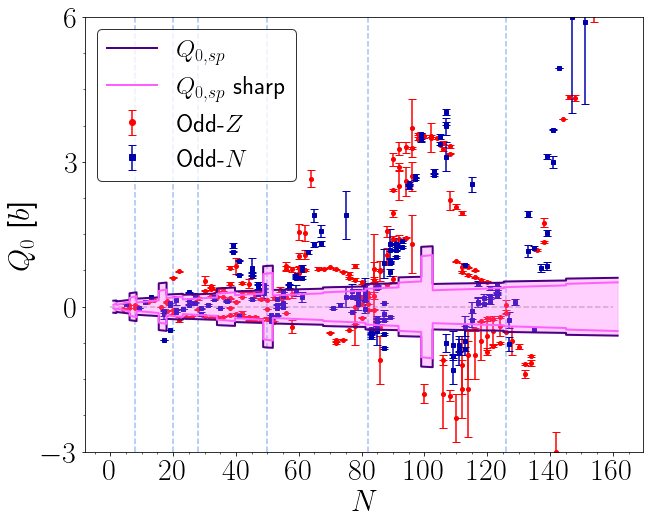

In [26]:
# Plot of 

plt.figure(figsize=((10,8)))
plt.rcParams["text.usetex"] = True

# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd[3])):
    try: 
        if len(dataqdep_odd[3][i]) == 2:
            lower_error.append(dataqdep_odd[3][i][1])
            upper_error.append(dataqdep_odd[3][i][0])
    except: 
        lower_error.append(dataqdep_odd[3][i])
        upper_error.append(dataqdep_odd[3][i])
# =================================================================================        

# Odd Z
#dataq_Z_Z = [] 
#dataq_A_Z = [] 
dataq_A = [] 

dataq_A_oddZ = [] 
dataq_A_oddN = [] 

dataq_Z = [] 
dataq_N = [] 

dataqq_oddZ = [] 
dataq_lower_oddZ = [] 
dataq_upper_oddZ = [] 

dataqq_oddN = [] 
dataq_lower_oddN = [] 
dataq_upper_oddN = [] 

dataq_loweroddZ = [] 
dataq_upperoddZ = [] 

dataq_loweroddN = [] 
dataq_upperoddN = [] 

dataq_jp = []


for i in range(len(dataqdep_odd[0])):
    
    if dataqdep_odd[0][i]%2==1:
        dataq_Z.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddZ.append(dataqdep_odd[1][i])
        dataqq_oddZ.append(dataqdep_odd[2][i])
        dataq_loweroddZ.append(lower_error[i])
        dataq_upperoddZ.append(upper_error[i])
        
    else:
        
        dataq_N.append(dataqdep_odd[1][i] - dataqdep_odd[0][i])
        dataq_A_oddN.append(dataqdep_odd[1][i])
        dataqq_oddN.append(dataqdep_odd[2][i])    
        dataq_loweroddN.append(lower_error[i])
        dataq_upperoddN.append(upper_error[i])   
        
    
asymmetric_erroroddZ = np.array(list(zip(dataq_loweroddZ, dataq_upperoddZ))).T
asymmetric_erroroddN = np.array(list(zip(dataq_loweroddN, dataq_upperoddN))).T

plt.errorbar(dataq_Z, dataqq_oddZ, yerr=asymmetric_erroroddZ, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 
plt.errorbar(dataq_N, dataqq_oddN, yerr=asymmetric_erroroddN, fmt='s', color = "#0000AF" ,markersize=4, capsize=4, label="Odd-$N$") 
plt.vlines(8, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(20, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(28, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(50, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(82, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(126, -3, 6, colors='#659bec', linestyles='--', alpha=0.6)



plt.xticks(np.arange(0,300,20), fontsize=30)
plt.yticks(np.arange(-9, 15,3), fontsize=30)


plt.xlabel("$N$", fontsize=30)
plt.ylabel(r"$Q_0$ [$b$]", size=30)
#plt.text(150, 7.8, "(a)", fontsize=45, weight='bold' )
plt.hlines(0, 0, 160, colors='gray', linestyles='--', alpha=0.5)

plt.minorticks_on()
# plt.tick_params(axis='x', which='minor', bottom=False)
# plt.tick_params(axis='y', which='minor', length=2, width=1)



# # Adding sp-lines
# plt.plot(np.arange(0,165,5), Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), Q_0_sp(9/2,np.arange(0,165,5)), "o-")

# plt.plot(np.arange(0,165,5), -1*Q_0_sp(1/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(3/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(5/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(7/2,np.arange(0,165,5)), "o-")
# plt.plot(np.arange(0,165,5), -1*Q_0_sp(9/2,np.arange(0,165,5)), "o-")

c3="#4B0082"
plt.plot(N_values, -1*np.array(Q0_values), "-", c=c3, zorder=30, linewidth=2)
plt.plot(N_values, Q0_values, "-", c=c3, zorder=30, linewidth=2, label=r"$Q_{0,sp}$")

c3 = "#FF60FD"
plt.plot(N_values_sharp, -1*np.array(Q0_values_sharp), "-", c=c3, zorder=30, linewidth=2)
plt.plot(N_values_sharp, Q0_values_sharp, "-", c=c3, zorder=30, linewidth=2, label=r"$Q_{0,sp}$ sharp")


# Fill the area between the two curves
plt.fill_between(
    N_values,
    Q0_values,
    -1*np.array(Q0_values),
    color=c3,
    alpha=0.3,   # transparency
    zorder=10
)

plt.ylim(-3, 6)


plt.legend(fontsize=25, edgecolor="black", loc="upper left", markerscale=1.5)
plt.savefig("QExp1-odd-A-sp-sharp_shell.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-A-sp-sharp_shell.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp1-odd-A-sp-sharp_shell.pdf", facecolor='white', bbox_inches='tight')

plt.show()